In [14]:
from collections import Counter
from random import random, seed
import math
import matplotlib.pyplot as plt

# Исследование одномерных данных

def backetize(point, bucket_size):
    """
    приводит точку данных к номеру интервала
    """
    # округлить точку до следующего наименьшегго кратного размера интервала bucket_size
    return bucket_size * math.floor(point / bucket_size)


def make_histogram(points, bucket_size):
    """
    готовит гистограмму
    """
    return Counter(backetize(point, bucket_size) for point in points)


def plot_histogram(points, bucket_size, title=''):
    """
    печать гистограммы
    """
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

    

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """
    Найти приближенную инверсию, используя двоичный поиск
    copy from hypothesis_and_conclusion
    """
    # если не стандартизированно, то стандартизировать и прошкалировать
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10, 0
    hi_z, hi_p = 10, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = (low_z + hi_z) / 2
        if mid_p < p:
            #значение середины все еще слишком низкое, искать выше
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            #значение середины все еще слишком высокое - искать ниже
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    
    return mid_z

In [25]:
seed(0)

# рассмотрим два набора данных
# 1 - равномерно распределенные между -100 и 100
uniform = [200 * random() - 100 for _ in range(10000)]

# 2 - нормально распределенные с нулевым средним, стандартным отклонением 57
normal = [57 * inverse_normal_cdf(random()) for _ in range(10000)]

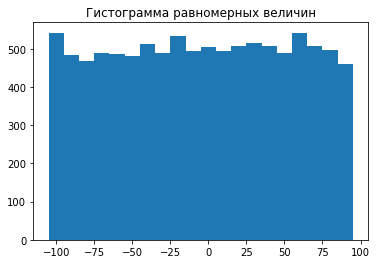

In [26]:
plot_histogram(uniform, 10, 'Гистограмма равномерных величин')

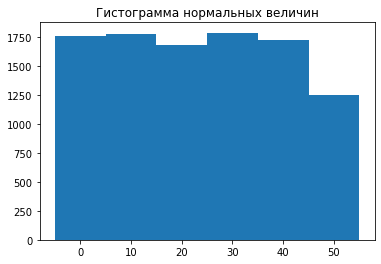

In [27]:
plot_histogram(normal, 10, 'Гистограмма нормальных величин')